# Figures S1, S2, S3: verify that ICON 2.1.00 simulations run on DKRZ Mistral reproduce the ICON-NWP-2.0.15 simulations of Schaefer and Voigt (2018) run on KIT SCC high-performance computing systems

Schaefer and Voigt, 2018, GRL, Radiation Weakens Idealized Midlatitude Cyclones, https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017GL076726; model output was retrieved from bwDataArchive (cf. acknowledgement section of their paper).

Comparison is made in terms of EKE and cyclone central pressure (cf. Fig. 1 of Schaefer and Voigt), as well as area means of cloud cover and accumulated precipitation (cf. Figs. S2 and S4 of the supplementary material of Schaefer and Voigt).

**Schaefer and Voigt simulations, all with 80% initial relative humidity:**
* R02B06lc1rad0clrh0_8 : clear-sky radiative heating only 
* R02B06lc1rad0rh0_8 : no radiative heating 
* R02B06lc1radrh0_8 :  all-sky radiative heating

**ICON 2.1.00 simulations, all with 80% initial relative humidity:**
* lc1-i2100-0001 : all-sky radiative heating
* lc1-i2100-0002 : no radiative heating 
* lc1-i2100-0003 : clear-sky radiative heating only 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys; sys.path.append("../helperfuncs")
from myfunctions import domainmean, eke, corepressure, beautify_timeseries

## Load data.

Load Schaefer and Voigt data.

In [2]:
path = "/work/bb1135/b380459/Schaefer-Voigt-GRL2018/consolidated/"

# 3D data
sv_no = xr.open_dataset(path+"/icon-R02B06lc1rad0rh0_8-atmfields_ll_DOM01_PL_15d.nc")      # no radiation
sv_as = xr.open_dataset(path+"/icon-R02B06lc1radrh0_8-atmfields_ll_DOM01_PL_15d.nc")       # all-sky radiation
sv_cs = xr.open_dataset(path+"/icon-R02B06lc1rad0clrh0_8-atmfields_ll_DOM01_PL_15d.nc")    # clear-sky radiation

# surface data
sv_no_sfc = xr.open_dataset(path+"/icon-R02B06lc1rad0rh0_8-sfcfields_ll_DOM01_ML_15d.nc")   # no radiation
sv_as_sfc = xr.open_dataset(path+"/icon-R02B06lc1radrh0_8-sfcfields_ll_DOM01_ML_15d.nc")    # all-sky radiation
sv_cs_sfc = xr.open_dataset(path+"/icon-R02B06lc1rad0clrh0_8-sfcfields_ll_DOM01_ML_15d.nc") # clear-sky radiation

Load ICON 2.1.00 data.

In [3]:
path = "/work/bb1135/b380459/Butz-MSc2022/consolidated"

# 3D data
i21_no = xr.open_dataset(path+"/"+"icon-lc1-i2100-0002-atmfields_ll_DOM01_PL.nc").rename({"plev_3": "lev"}) # no radiation
i21_as = xr.open_dataset(path+"/"+"icon-lc1-i2100-0001-atmfields_ll_DOM01_PL.nc").rename({"plev_3": "lev"}) # all-sky radiation
i21_cs = xr.open_dataset(path+"/"+"icon-lc1-i2100-0003-atmfields_ll_DOM01_PL.nc").rename({"plev_3": "lev"}) # clear-sky radiation

# surface data
i21_no_sfc = xr.open_dataset(path+"/"+"icon-lc1-i2100-0002-sfcfields_ll_DOM01_ML.nc") # no radiation
i21_as_sfc = xr.open_dataset(path+"/"+"icon-lc1-i2100-0001-sfcfields_ll_DOM01_ML.nc") # all-sky radiation
i21_cs_sfc = xr.open_dataset(path+"/"+"icon-lc1-i2100-0003-sfcfields_ll_DOM01_ML.nc") # clear-sky radiation

## Make plots.

**Plot time series of global-mean EKE and cyclone central pressure.**

In [4]:
timesv  = np.arange(0,sv_no_sfc.time.size/4,0.25)  # time in units of days
timei21 = np.arange(0,i21_no_sfc.time.size/4,0.25) # time in units of days

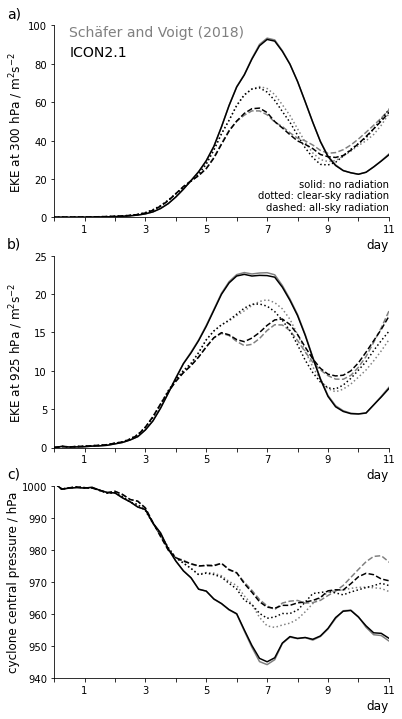

In [5]:
plt.figure(figsize=(6,12))

# EKE at 300 hPa
ax=plt.subplot(3,1,1)
plt.plot(timesv,  domainmean(eke(sv_no)).sel(lev=300e2), color="gray", linestyle="-", label="SV no rad")
plt.plot(timesv,  domainmean(eke(sv_as)).sel(lev=300e2), color="gray", linestyle="--",  label="SV all-sky")
plt.plot(timesv,  domainmean(eke(sv_cs)).sel(lev=300e2), color="gray", linestyle=":",  label="SV clr-sky")
plt.plot(timei21, domainmean(eke(i21_no)).sel(lev=300e2), color="k",   linestyle="-", label="I21 no rad")
plt.plot(timei21, domainmean(eke(i21_as)).sel(lev=300e2), color="k",   linestyle="--",  label="I21 all-sky")
plt.plot(timei21, domainmean(eke(i21_cs)).sel(lev=300e2), color="k",   linestyle=":",  label="I21 clr-sky")
beautify_timeseries(ax)
plt.ylabel(r"EKE at 300 hPa / m$^{2}$s$^{-2}$", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,100)
plt.text(0.5, 100, "Schäfer and Voigt (2018)", color="gray", size=14, va="top")
plt.text(0.5, 90, "ICON2.1", color="k", size=14, va="top")
plt.text(11, 20, "solid: no radiation", color="k", size=10, ha="right", va="top")
plt.text(11, 14, "dotted: clear-sky radiation", color="k", size=10, ha="right", va="top")
plt.text(11,  8, "dashed: all-sky radiation", color="k", size=10, ha="right", va="top")
ax.text(-0.14,1.1, "a)", ha="left", va="top", transform=ax.transAxes, size=14)

# EKE at 925 hPa
ax=plt.subplot(3,1,2)
plt.plot(timesv,  domainmean(eke(sv_no)).sel(lev=925e2), color="gray", linestyle="-", label="SV no rad")
plt.plot(timesv,  domainmean(eke(sv_as)).sel(lev=925e2), color="gray", linestyle="--",  label="SV all-sky")
plt.plot(timesv,  domainmean(eke(sv_cs)).sel(lev=925e2), color="gray", linestyle=":",  label="SV clr-sky")
plt.plot(timei21, domainmean(eke(i21_no)).sel(lev=925e2), color="k",   linestyle="-", label="I21 no rad")
plt.plot(timei21, domainmean(eke(i21_as)).sel(lev=925e2), color="k",   linestyle="--",  label="I21 all-sky")
plt.plot(timei21, domainmean(eke(i21_cs)).sel(lev=925e2), color="k",   linestyle=":",  label="I21 clr-sky")
beautify_timeseries(ax)
plt.ylabel(r"EKE at 925 hPa / m$^{2}$s$^{-2}$", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,25)
ax.text(-0.14,1.1, "b)", ha="left", va="top", transform=ax.transAxes, size=14)

# cyclone core pressure of mean cyclone
ax=plt.subplot(3,1,3)
plt.plot(timesv,  1e-2*corepressure(sv_no_sfc,meancyclone=True), color="gray", linestyle="-", label="SV no rad")
plt.plot(timesv,  1e-2*corepressure(sv_as_sfc,meancyclone=True), color="gray", linestyle="--",  label="SV all-sky")
plt.plot(timesv,  1e-2*corepressure(sv_cs_sfc,meancyclone=True), color="gray", linestyle=":",  label="SV clr-sky")
plt.plot(timei21, 1e-2*corepressure(i21_no_sfc,meancyclone=True), color="k",   linestyle="-", label="I21 no rad")
plt.plot(timei21, 1e-2*corepressure(i21_as_sfc,meancyclone=True), color="k",   linestyle="--",  label="I21 all-sky")
plt.plot(timei21, 1e-2*corepressure(i21_cs_sfc,meancyclone=True), color="k",   linestyle=":",  label="I21 clr-sky")
beautify_timeseries(ax)
plt.ylabel("cyclone central pressure / hPa", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
ax.spines['bottom'].set_position(('data',940))
plt.ylim(940,1000)
ax.text(-0.14,1.1, "c)", ha="left", va="top", transform=ax.transAxes, size=14)

plt.savefig("figure_S1.pdf")

**Time series of area-mean cloud cover averaged between 26N and 64N.**

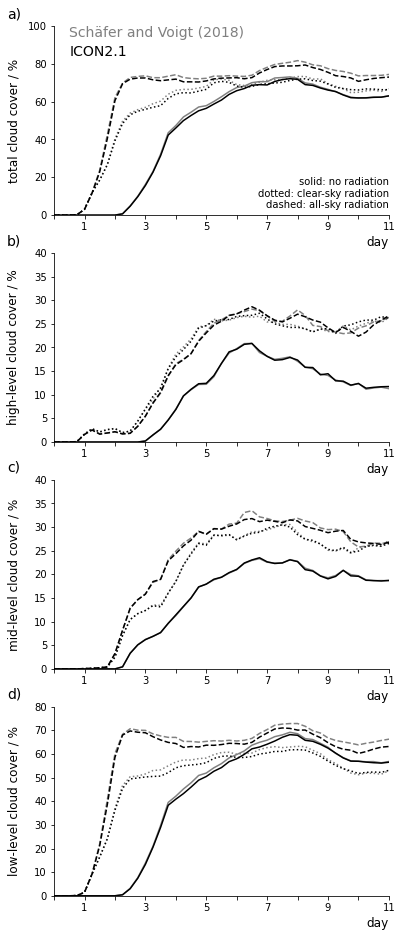

In [6]:
def make_cloud_timeseries(var="clct"):
    plt.plot(timesv,  domainmean(sv_no_sfc[var].sel(lat=slice(64,26))), color="gray", linestyle="-", label="SV no rad")
    plt.plot(timesv,  domainmean(sv_as_sfc[var].sel(lat=slice(64,26))), color="gray", linestyle="--",  label="SV all-sky")
    plt.plot(timesv,  domainmean(sv_cs_sfc[var].sel(lat=slice(64,26))), color="gray", linestyle=":",  label="SV clr-sky")
    plt.plot(timei21, domainmean(i21_no_sfc[var].sel(lat=slice(64,26))), color="k",   linestyle="-", label="I21 no rad")
    plt.plot(timei21, domainmean(i21_as_sfc[var].sel(lat=slice(64,26))), color="k",   linestyle="--",  label="I21 all-sky")
    plt.plot(timei21, domainmean(i21_cs_sfc[var].sel(lat=slice(64,26))), color="k",   linestyle=":",  label="I21 clr-sky")

plt.figure(figsize=(6,16))

ax=plt.subplot(4,1,1)
make_cloud_timeseries(var="clct")
beautify_timeseries(ax)
plt.ylabel(r"total cloud cover / %", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,100)
plt.text(0.5, 100, "Schäfer and Voigt (2018)", color="gray", size=14, va="top")
plt.text(0.5, 90, "ICON2.1", color="k", size=14, va="top")
plt.text(11, 20, "solid: no radiation", color="k", size=10, ha="right", va="top")
plt.text(11, 14, "dotted: clear-sky radiation", color="k", size=10, ha="right", va="top")
plt.text(11,  8, "dashed: all-sky radiation", color="k", size=10, ha="right", va="top")
ax.text(-0.14,1.1, "a)", ha="left", va="top", transform=ax.transAxes, size=14)

ax=plt.subplot(4,1,2)
make_cloud_timeseries(var="clch")
beautify_timeseries(ax)
plt.ylabel(r"high-level cloud cover / %", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,40)
ax.text(-0.14,1.1, "b)", ha="left", va="top", transform=ax.transAxes, size=14)

ax=plt.subplot(4,1,3)
make_cloud_timeseries(var="clcm")
beautify_timeseries(ax)
plt.ylabel(r"mid-level cloud cover / %", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,40)
ax.text(-0.14,1.1, "c)", ha="left", va="top", transform=ax.transAxes, size=14)

ax=plt.subplot(4,1,4)
make_cloud_timeseries(var="clcl")
beautify_timeseries(ax)
plt.ylabel(r"low-level cloud cover / %", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,80)
ax.text(-0.14,1.1, "d)", ha="left", va="top", transform=ax.transAxes, size=14)

plt.savefig("figure_S2.pdf")

**Time series of accumulated precipitation averaged between 26N and 64N.**

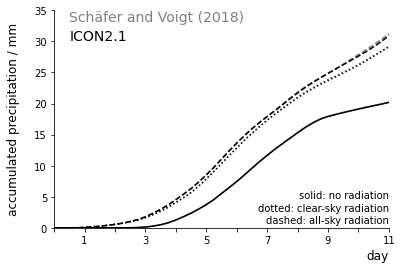

In [7]:
plt.figure(figsize=(6,4))

var="tot_prec"
ax=plt.subplot(1,1,1)
plt.plot(timesv,  domainmean(sv_no_sfc[var].sel(lat=slice(64,26))), color="gray", linestyle="-", label="SV no rad")
plt.plot(timesv,  domainmean(sv_as_sfc[var].sel(lat=slice(64,26))), color="gray", linestyle="--",  label="SV all-sky")
plt.plot(timesv,  domainmean(sv_cs_sfc[var].sel(lat=slice(64,26))), color="gray", linestyle=":",  label="SV clr-sky")
plt.plot(timei21, domainmean(i21_no_sfc[var].sel(lat=slice(64,26))), color="k",   linestyle="-", label="I21 no rad")
plt.plot(timei21, domainmean(i21_as_sfc[var].sel(lat=slice(64,26))), color="k",   linestyle="--",  label="I21 all-sky")
plt.plot(timei21, domainmean(i21_cs_sfc[var].sel(lat=slice(64,26))), color="k",   linestyle=":",  label="I21 clr-sky")
beautify_timeseries(ax)
plt.ylabel(r"accumulated precipitation / mm", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,35)
plt.text(0.5, 35, "Schäfer and Voigt (2018)", color="gray", size=14, va="top")
plt.text(0.5, 32, "ICON2.1", color="k", size=14, va="top")
plt.text(11, 6, "solid: no radiation", color="k", size=10, ha="right", va="top")
plt.text(11, 4, "dotted: clear-sky radiation", color="k", size=10, ha="right", va="top")
plt.text(11, 2, "dashed: all-sky radiation", color="k", size=10, ha="right", va="top")

plt.savefig("figure_S3.pdf")